In [1]:
import numpy as np

# import cPickle

import _pickle as cPickle
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = cPickle.load(open('/content/drive/MyDrive/dissertation project/time_200913_to_201013.p', 'rb'))

In [4]:
# choosing valid data
a = data[(data.latitude>0)&(data.longitude>0)]
data = a[(a.latitude<=360)&(a.longitude<=360)]

# choosing stationary sensor
keepcids = []# this is a list consists of channel id
for cid in set(data['channel_id']):
    static = np.mean(np.abs(np.diff(data[data['channel_id']==cid]['latitude'])))<0.0001
    if static: keepcids.append(cid)

dstatic = data.loc[data['channel_id'].isin(keepcids)]

# put the last sensor's information into df
sensor = dstatic[dstatic.channel_id==keepcids[59]]
sensor['created_at'] = pd.to_datetime(sensor['created_at'])
df = sensor.resample('60min', on='created_at').mean()
df = df[0:1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [5]:
# put all the sensors' information into df
# as each sensor has different created time, it is difficult to find a time at which all the sensors have values, I just pick the first row of each sensor dataframe
for x in range(len(keepcids)-1):
  sensor = dstatic[dstatic.channel_id==keepcids[x]]
  sensor['created_at'] = pd.to_datetime(sensor['created_at'])
  df1 = sensor.resample('60min', on='created_at').mean() # take values each hour and compute the average 
  df1 = df1[0:1] # pick the first line
  df = df.append(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [6]:
# df is the dataframe which consists of 60 different sensors' information
df

,channel_id,entry_id,pm2_5,pm10,s2_pm2_5,s2_pm10,latitude,longitude,voltage,altitude,wind,no_sats,hdope,temperature,humidity
created_at,,,,,,,,,,,,,,,
2020-09-13 00:00:00,832253.0,221564.00000,49.649070,61.227674,49.922791,62.200233,0.271560,32.556034,4.559302,1161.209302,0.000000,14.372093,76.744186,0.000000,0.000000
2020-09-13 04:00:00,870144.0,135826.50000,66.335000,75.810000,64.575000,73.875000,0.306986,32.651623,3.510000,1167.200000,0.005000,12.000000,61.000000,0.000000,13874.500000
2020-09-15 08:00:00,930433.0,6834.00000,37.720000,45.830000,37.930000,45.020000,0.652597,30.274055,4.050000,1526.700000,0.090000,6.000000,105.000000,37.000000,0.000000
2020-09-13 00:00:00,870146.0,204649.50000,47.959091,59.360909,51.090909,62.985455,0.332319,32.569875,4.362273,1218.179545,0.005000,9.886364,88.181818,0.000000,0.000000
2020-09-13 00:00:00,782718.0,286347.00000,50.035349,58.400930,50.121395,58.481163,0.344081,32.553405,4.389750,1195.810000,0.051250,8.710526,97.756757,0.000000,27751.500000
2020-09-13 00:00:00,782720.0,304623.00000,53.803953,66.979535,53.485814,65.319302,0.351729,32.591203,4.321628,1181.988372,0.147209,7.837209,113.604651,0.000000,0.000000
2020-09-13 00:00:00,782719.0,457329.00000,38.748667,47.056667,29.730000,31.568222,0.298693,32.614935,4.140000,1207.551111,0.184222,5.644444,156.000000,0.000000,0.000000
2020-09-13 00:00:00,782722.0,391364.00000,51.346744,61.000233,50.975349,60.885581,0.283653,32.600410,4.432791,1152.113953,0.144884,7.046512,151.720930,23.000000,95.000000
2020-09-13 00:00:00,870145.0,256757.00000,52.147895,71.710000,49.378421,62.860000,0.363945,32.626278,3.341579,1214.926316,0.000000,7.842105,96.111111,0.000000,23784.857143


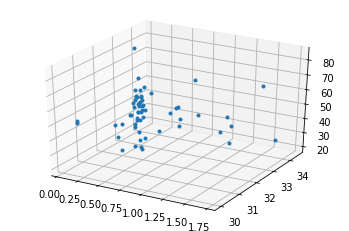

In [7]:
#plot it
latitude=list(df['latitude'])
longitude=list(df['longitude'])
pm2_5 = list(df['pm2_5'])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(latitude, longitude, pm2_5, '.', alpha=1)
plt.show()

In [8]:
!pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 959 kB 5.2 MB/s 
     |████████████████████████████████| 71 kB 7.5 MB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565106 sha256=0c9509c02c632d673f549703114c331e59e7f1471b73b4b602d66945947af186
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=074adfe65e598afd1fde0b24df3785d4cd939ca8e09f7eeeff670c37c5869ba8
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


In [9]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import scipy.stats
from scipy.stats import invgamma

In [10]:
#real data test1

In [11]:
# Training Data
b = []
for x in range(len(latitude)):
  a = [latitude[x]]
  a.append(longitude[x])
  b.append(a)
X = np.array(b)

b = []
for x in range(len(pm2_5)):
  a = [pm2_5[x]]
  b.append(a)
y = np.array(b)

 /usr/local/lib/python3.7/dist-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f654eae9390>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7f654eae9710>]}

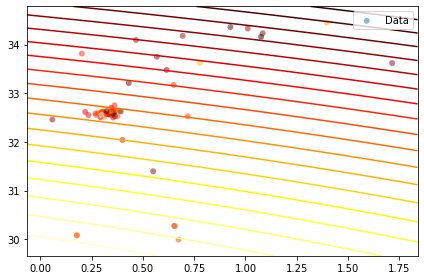

In [12]:
#fit the GP
k = GPy.kern.RBF(2) #<--EQ kernel
m = GPy.models.GPRegression(X,y,k)
m.optimize()

#plot it
m.plot()

In [13]:
m

GP_regression.,value,constraints,priors
rbf.variance,1777.4781731168628,+ve,
rbf.lengthscale,15.225807764314675,+ve,
Gaussian_noise.variance,161.8399172024533,+ve,


After fitting, I can see from above that the parameter values are really really big compared to my synthetic data before.

Q: Are these values correct or valid?

In [14]:
# calculate predmean nd predvar
predmean, predvar = m.predict(X)

In [15]:
# compute NLPD
NLPD = np.sum(-np.log(scipy.stats.norm(predmean, np.sqrt(predvar)).pdf(y)))

In [16]:
# compute ML
m.log_likelihood()

-241.73643162910997

In [46]:
# sample 100 times for different lengthscales
results = []
#compute sum for all the MLs
# sum=0
# for ls in np.linspace(1,30,100):
#     m.rbf.lengthscale = ls 
#     ll = m.log_likelihood()
#     sum += ll
#for l in np.linspace(0,30,100): #compute for different lengthscales
for ls in np.linspace(1,30,100):
    m.rbf.lengthscale = ls
    ll = m.log_likelihood()
    results.append([round(ls,3),round(ll,3)])
    # results.append([round(ls,3),round(ll,3),round(ll/sum,3)])
results = np.array(results)

Here I just keep the variance and gaussian noise value after fitting and try different values for lengthscales. I think I can do a better program in the week end to try differentt values for both lengthscale and gaussian noise value together.

Q: Do I have to set the variance valuefirst? How to set it?Or just keep it as the one after fitting?

In [47]:
results

array([[   1.   , -249.449],
       [   1.293, -247.792],
       [   1.586, -246.822],
       [   1.879, -246.132],
       [   2.172, -245.564],
       [   2.465, -245.076],
       [   2.758, -244.654],
       [   3.051, -244.287],
       [   3.343, -243.968],
       [   3.636, -243.69 ],
       [   3.929, -243.446],
       [   4.222, -243.233],
       [   4.515, -243.047],
       [   4.808, -242.884],
       [   5.101, -242.741],
       [   5.394, -242.617],
       [   5.687, -242.509],
       [   5.98 , -242.414],
       [   6.273, -242.332],
       [   6.566, -242.26 ],
       [   6.859, -242.197],
       [   7.152, -242.141],
       [   7.444, -242.093],
       [   7.737, -242.05 ],
       [   8.03 , -242.012],
       [   8.323, -241.978],
       [   8.616, -241.948],
       [   8.909, -241.922],
       [   9.202, -241.898],
       [   9.495, -241.877],
       [   9.788, -241.858],
       [  10.081, -241.842],
       [  10.374, -241.827],
       [  10.667, -241.814],
       [  10.9

I have a questions here. As you see, the ML values here are very close (for different lengthscales), so that if I sum them up and divide each by the sum, they will be very close, about 0.01 as I sample 100 times.

Q: How to solve it?

In [48]:
data = np.array(pm2_5)

In [50]:
# definition for gaussian distribution
#均值
def average(data):
    return np.sum(data)/len(data)
#标准差
def sigma(data,avg):
    sigma_squ=np.sum(np.power((data-avg),2))/len(data)
    return np.power(sigma_squ,0.5)
#高斯分布概率
def prob(data,avg,sig):
    print(data)
    sqrt_2pi=np.power(2*np.pi,0.5)
    coef=1/(sqrt_2pi*sig)
    powercoef=-1/(2*np.power(sig,2))
    mypow=powercoef*(np.power((data-avg),2))
    return coef*(np.exp(mypow))

[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]
[0.000e+00

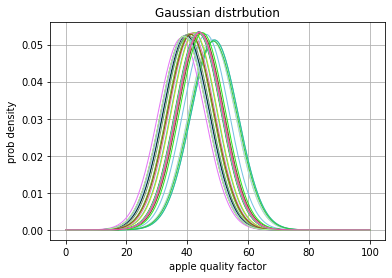

In [51]:
# for loop to plot

for x in range(len(predmean)):
  data = np.array(np.linspace(predmean[x]-np.sqrt(predvar[x]),predmean[x]+np.sqrt(predvar[x]),100))
  ave=average(data)
  sig=sigma(data,ave)
  x=np.arange(0,100,0.01)
  p=prob(x,ave,sig)
  r=random.random()
  g=random.random()
  b=random.random()
  plt.plot(x,p,color=(r,g,b), linewidth=1)

plt.grid()
plt.xlabel("apple quality factor")
plt.ylabel("prob density")
plt.title("Gaussian distrbution")
plt.show()